In [28]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix
import seaborn as sns
from keras.datasets import mnist
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score


## Import Dataset

In [2]:
#import data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
#Look at the shape of our data
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [4]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

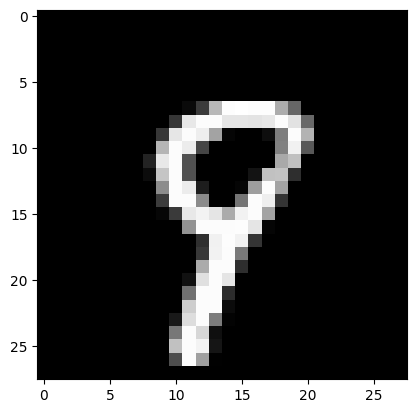

In [5]:
#lets pick  random image to display
random_num = np.random.randint(0, 60000)

#visualize using imshow()
plt.imshow(X_train[random_num], cmap="gray")

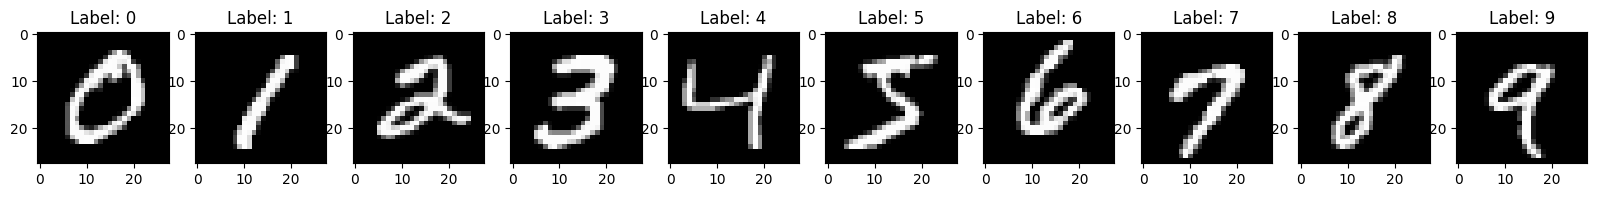

In [6]:
#visualize one example per each digit
#using a for loop and matplotlib
num_classes = 10

#create a subplot
fig, ax = plt.subplots(1, num_classes, figsize=(20, 20))

for i in range(num_classes):
    sample = X_train[y_train==i][0]
    ax[i].imshow(sample, cmap="gray")
    ax[i].set_title(f"Label: {i}")


In [7]:
print(y_train)

[5 0 4 ... 5 6 8]


In [8]:
#encode labels
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [9]:
#look at the first 10 values in y_train
for i in range(10):
    print(y_train[i])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [10]:
#normalize the images
X_train = X_train / 255.0
X_test = X_test / 255.0

In [11]:
X_train.shape

(60000, 28, 28)

In [12]:
#reshape the images
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
X_train.shape

(60000, 784)

In [13]:
#Create the neural network model
model = Sequential()

model.add(Dense(units=128, input_shape=(784,), activation="relu"))
model.add(Dense(units=128, activation="relu"))
model.add(Dropout(0.25))
model.add(Dense(units=10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

C:\Users\krcd58\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
BATCH_SIZE = 512
epochs = 11
history = model.fit(x=X_train, y=y_train, batch_size=BATCH_SIZE, epochs=epochs)

Epoch 1/11
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6867 - loss: 1.0485
Epoch 2/11
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9301 - loss: 0.2400
Epoch 3/11
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9490 - loss: 0.1723
Epoch 4/11
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9612 - loss: 0.1302
Epoch 5/11
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9683 - loss: 0.1052
Epoch 6/11
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9728 - loss: 0.0907
Epoch 7/11
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9759 - loss: 0.0783
Epoch 8/11
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9796 - loss: 0.0688
Epoch 9/11
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9817 - loss: 0.0618
Epoch 10/11
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9838 - loss: 0.0535
Epoch 11/11
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9859 - loss: 0.0475


In [15]:
#Evaluate and test
train_loss, train_acc = model.evaluate(X_train, y_train)
test_loss, test_acc = model.evaluate(X_test, y_test)

#print results
print(f"Train loss: {train_loss}, Train Accuracy: {train_acc}")
print(f"Test loss: {test_loss}, Test Accuarcy: {test_acc}")

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 567us/step - accuracy: 0.9917 - loss: 0.0300
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 605us/step - accuracy: 0.9748 - loss: 0.0801
Train loss: 0.030056346207857132, Train Accuracy: 0.9916166663169861
Test loss: 0.06993769109249115, Test Accuarcy: 0.9783999919891357


In [16]:
print(history.history.keys())

dict_keys(['accuracy', 'loss'])


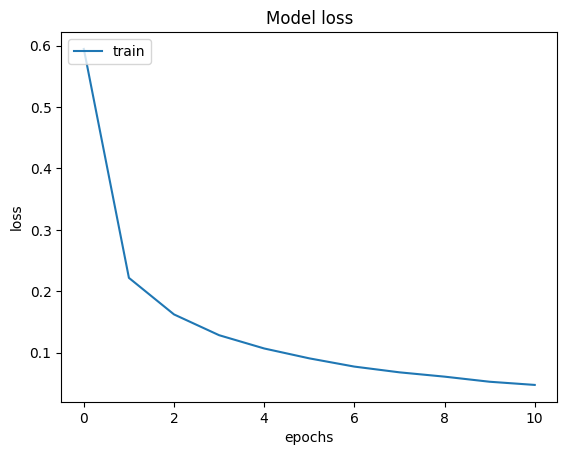

In [17]:
#summarize the model loss
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train'], loc='upper left')
plt.show()

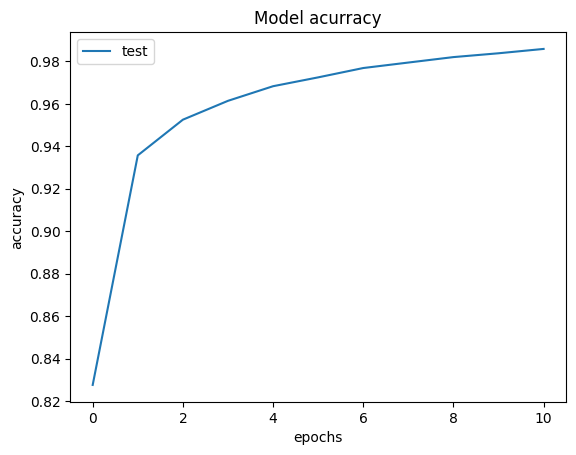

In [18]:
#summarize the model loss
plt.plot(history.history['accuracy'])
plt.title('Model acurracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['test'], loc='upper left')
plt.show()

In [19]:
#predict labels on test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

#print vector of probabilities
print(f"What softmax predicted {y_pred[1]}")

#print the prdicted number
print(f"What softmax actually means: {y_pred_classes[1]}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 473us/step
What softmax predicted [2.3585500e-08 6.8931469e-05 9.9992347e-01 4.0522082e-06 2.9816611e-09
 2.5991463e-07 1.9986292e-06 1.3973994e-09 1.2951958e-06 7.1275512e-12]
What softmax actually means: 2


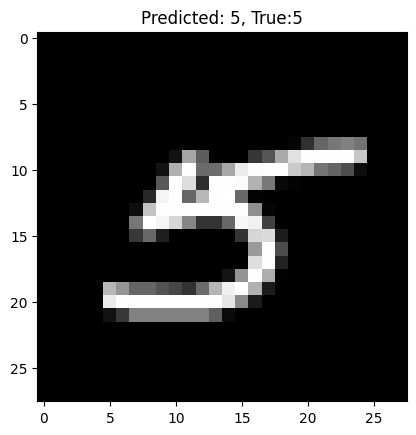

In [27]:
#choose a random sample from all test data
random_num = np.random.choice(len(X_test))
X_sample = X_test[random_num]

#get the true label for the sample variable
y_true = np.argmax(y_test, axis=1)
y_sample_true = y_true[random_num]

#save the [redicted label of the variable
y_sample_pred_class = y_pred_classes[random_num]

#visualize
plt.title(f"Predicted: {y_sample_pred_class}, True:{y_sample_true}")
plt.imshow(X_sample.reshape(28, 28), cmap="gray")

Text(0.5, 1.0, 'Confusion Matrix')

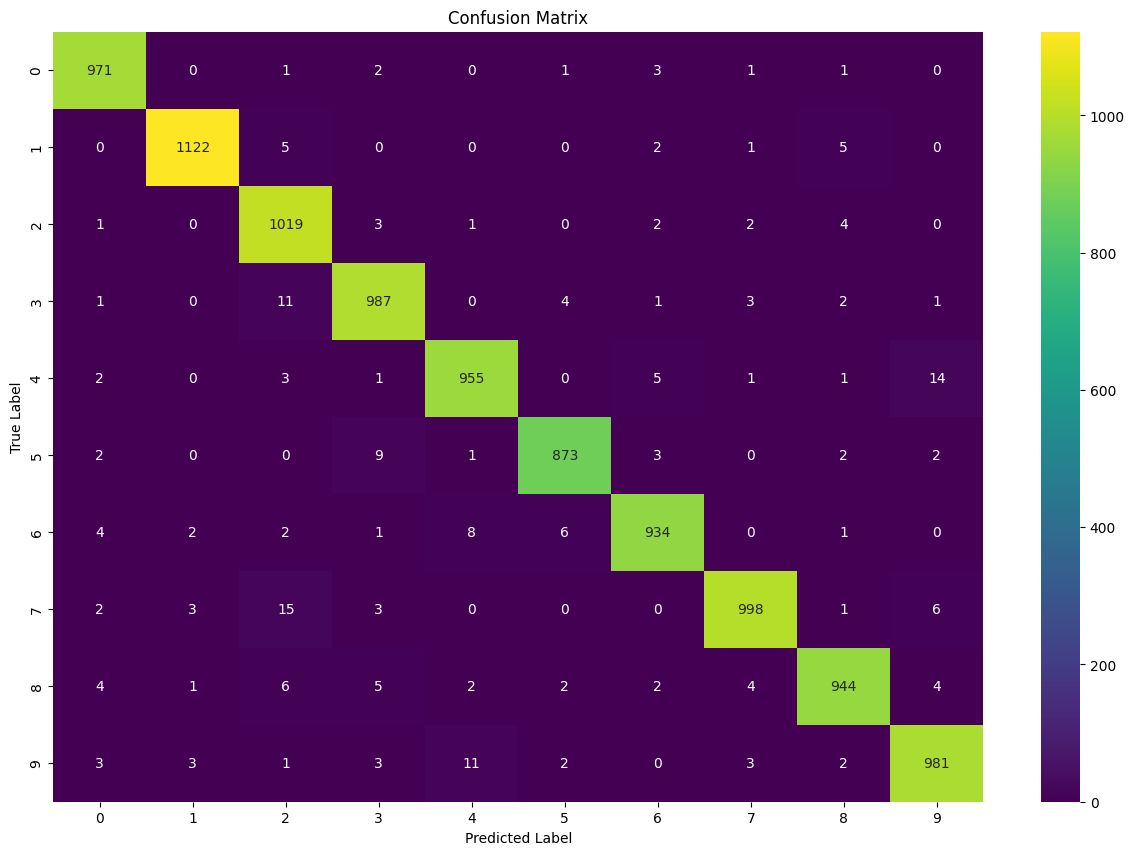

In [22]:
#gennerate a confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

#visualize the matrix
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(confusion_mtx, annot=True, fmt="d", ax=ax, cmap="viridis")
ax.set_xlabel("Predicted Label")
ax.set_ylabel("True Label")
ax.set_title("Confusion Matrix")

In [29]:
#Calculate precision, recall, and f1
y_test_classes = np.argmax(y_test, axis=1)
precision = precision_score(y_test_classes, y_pred_classes, average="weighted")

#calculate recall
recall = recall_score(y_test_classes, y_pred_classes, average="weighted")

#Calculate f1 score
f1 = f1_score(y_test_classes, y_pred_classes, average="weighted")

#print the precision, recall, and f1 scores
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Precision: 0.98
Recall: 0.98
F1 Score: 0.98
